# Latent Network Models

## install package and load

In [1]:
install.packages("igraph")
install.packages("eigenmodel")
install.packages("sand")
install.packages("ROCR")

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpMfUhbg\downloaded_packages
package 'eigenmodel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpMfUhbg\downloaded_packages


also installing the dependency 'igraphdata'



package 'igraphdata' successfully unpacked and MD5 sums checked
package 'sand' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpMfUhbg\downloaded_packages


also installing the dependencies 'bitops', 'caTools', 'gplots'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpMfUhbg\downloaded_packages


In [3]:
library(igraph)
library(eigenmodel)
library(sand)
library(ROCR)

## data summary

In [4]:
summary(lazega)

IGRAPH 3e8b2bf UN-- 36 115 -- 
+ attr: name (v/c), Seniority (v/n), Status (v/n), Gender (v/n), Office
| (v/n), Years (v/n), Age (v/n), Practice (v/n), School (v/n)


## no covariate latent model fitting

In [5]:
set.seed(42)
A<-get.adjacency(lazega,sparse=FALSE)
lazega.leig.fit1<-eigenmodel_mcmc(A,R=2,S=11000,burn=10000)

5 percent done (iteration 1050) Mon Dec 14 22:59:13 2020
10 percent done (iteration 2100) Mon Dec 14 22:59:16 2020
15 percent done (iteration 3150) Mon Dec 14 22:59:20 2020
20 percent done (iteration 4200) Mon Dec 14 22:59:24 2020
25 percent done (iteration 5250) Mon Dec 14 22:59:27 2020
30 percent done (iteration 6300) Mon Dec 14 22:59:31 2020
35 percent done (iteration 7350) Mon Dec 14 22:59:34 2020
40 percent done (iteration 8400) Mon Dec 14 22:59:38 2020
45 percent done (iteration 9450) Mon Dec 14 22:59:41 2020
50 percent done (iteration 10500) Mon Dec 14 22:59:45 2020
55 percent done (iteration 11550) Mon Dec 14 22:59:48 2020
60 percent done (iteration 12600) Mon Dec 14 22:59:52 2020
65 percent done (iteration 13650) Mon Dec 14 22:59:55 2020
70 percent done (iteration 14700) Mon Dec 14 22:59:59 2020
75 percent done (iteration 15750) Mon Dec 14 23:00:02 2020
80 percent done (iteration 16800) Mon Dec 14 23:00:06 2020
85 percent done (iteration 17850) Mon Dec 14 23:00:10 2020
90 perc

## latent model with covariate(practice)

In [6]:
same.prac.op<-v.attr.lazega$Practice %o% v.attr.lazega$Practice #practice is 1 or 2 or 3
same.prac <- matrix(as.numeric(same.prac.op %in% c(1,4,9)), 36, 36)
same.prac <- array(same.prac, dim=c(36,36,1))
lazega.leig.fit2<-eigenmodel_mcmc(A,same.prac,R=2,S=11000,burn=10000)

5 percent done (iteration 1050) Mon Dec 14 23:01:24 2020
10 percent done (iteration 2100) Mon Dec 14 23:01:28 2020
15 percent done (iteration 3150) Mon Dec 14 23:01:32 2020
20 percent done (iteration 4200) Mon Dec 14 23:01:35 2020
25 percent done (iteration 5250) Mon Dec 14 23:01:39 2020
30 percent done (iteration 6300) Mon Dec 14 23:01:43 2020
35 percent done (iteration 7350) Mon Dec 14 23:01:47 2020
40 percent done (iteration 8400) Mon Dec 14 23:01:51 2020
45 percent done (iteration 9450) Mon Dec 14 23:01:55 2020
50 percent done (iteration 10500) Mon Dec 14 23:01:59 2020
55 percent done (iteration 11550) Mon Dec 14 23:02:02 2020
60 percent done (iteration 12600) Mon Dec 14 23:02:06 2020
65 percent done (iteration 13650) Mon Dec 14 23:02:10 2020
70 percent done (iteration 14700) Mon Dec 14 23:02:14 2020
75 percent done (iteration 15750) Mon Dec 14 23:02:18 2020
80 percent done (iteration 16800) Mon Dec 14 23:02:22 2020
85 percent done (iteration 17850) Mon Dec 14 23:02:26 2020
90 perc

## latent model with covariate(office)

In [7]:
same.off.op<-v.attr.lazega$Office %o% v.attr.lazega$Office
same.off <- matrix(as.numeric(same.off.op %in% c(1,4,9)), 36, 36)
same.off <- array(same.off, dim=c(36,36,1))
lazega.leig.fit3<-eigenmodel_mcmc(A,same.off,R=2,S=11000,burn=10000)

5 percent done (iteration 1050) Mon Dec 14 23:03:38 2020
10 percent done (iteration 2100) Mon Dec 14 23:03:41 2020
15 percent done (iteration 3150) Mon Dec 14 23:03:45 2020
20 percent done (iteration 4200) Mon Dec 14 23:03:49 2020
25 percent done (iteration 5250) Mon Dec 14 23:03:53 2020
30 percent done (iteration 6300) Mon Dec 14 23:03:57 2020
35 percent done (iteration 7350) Mon Dec 14 23:04:01 2020
40 percent done (iteration 8400) Mon Dec 14 23:04:05 2020
45 percent done (iteration 9450) Mon Dec 14 23:04:08 2020
50 percent done (iteration 10500) Mon Dec 14 23:04:12 2020
55 percent done (iteration 11550) Mon Dec 14 23:04:16 2020
60 percent done (iteration 12600) Mon Dec 14 23:04:20 2020
65 percent done (iteration 13650) Mon Dec 14 23:04:24 2020
70 percent done (iteration 14700) Mon Dec 14 23:04:28 2020
75 percent done (iteration 15750) Mon Dec 14 23:04:32 2020
80 percent done (iteration 16800) Mon Dec 14 23:04:36 2020
85 percent done (iteration 17850) Mon Dec 14 23:04:40 2020
90 perc

## save two eigen vector (estimated latent variables) for plot

In [8]:
lat.sp.1 <- eigen(lazega.leig.fit1$ULU_postmean)$vec[,1:2]
lat.sp.2 <- eigen(lazega.leig.fit2$ULU_postmean)$vec[,1:2]
lat.sp.3 <- eigen(lazega.leig.fit3$ULU_postmean)$vec[,1:2]

In [9]:
eigen(lazega.leig.fit1$ULU_postmean)$values #two eigen value is not 0 and others are 0 in our assumption(since dimension of latent variable is two)

[1] 65.09248141 26.22260690  1.51209927  0.54202613  0.52958543  0.42327398
 [7]  0.33921586  0.33239303  0.31960814  0.30883390  0.30350692  0.28283232
[13]  0.25085892  0.23925906  0.23762913  0.22651062  0.21980677  0.20390337
[19]  0.19721089  0.17973431  0.16999032  0.16740109  0.15979690  0.15845573
[25]  0.14412702  0.13457208  0.12819392  0.12399832  0.11423652  0.10832290
[31]  0.10599495  0.09827679  0.09610805  0.09410161  0.08830009  0.07978177

In [10]:
eigen(lazega.leig.fit2$ULU_postmean)$values #two eigen value is not 0 and others are 0 in our assumption(since dimension of latent variable is two)

[1]  2.213222e+01  5.276192e-01  3.958614e-01  3.354038e-01  3.131389e-01
 [6]  2.565605e-01  2.332088e-01  2.132047e-01  1.884968e-01  1.649826e-01
[11]  1.564181e-01  1.498190e-01  1.405626e-01  1.381794e-01  1.286480e-01
[16]  1.100743e-01  1.075170e-01  9.572946e-02  9.300046e-02  8.733631e-02
[21]  8.565879e-02  7.260718e-02  6.177869e-02  5.716489e-02  5.224512e-02
[26]  4.631077e-02  4.083812e-02  3.943588e-02  3.228483e-02  3.003629e-02
[31]  2.865214e-02  1.936230e-02  1.825502e-02  1.717456e-02 -1.461065e-03
[36] -1.015714e+02

In [11]:
eigen(lazega.leig.fit3$ULU_postmean)$values #two eigen value is not 0 and others are 0 in our assumption(since dimension of latent variable is two)

[1]  7.363706e+00  9.063328e-01  5.575554e-01  3.382379e-01  3.013947e-01
 [6]  2.461153e-01  2.328210e-01  1.937468e-01  1.829375e-01  1.786680e-01
[11]  1.364768e-01  1.211099e-01  1.125247e-01  1.094955e-01  1.083189e-01
[16]  9.502978e-02  7.946579e-02  7.003765e-02  6.720276e-02  6.102530e-02
[21]  5.613631e-02  4.819007e-02  4.289907e-02  3.581807e-02  3.420190e-02
[26]  2.723331e-02  2.029525e-02  1.299143e-02  6.584032e-03  5.321567e-04
[31] -8.779634e-03 -9.901685e-03 -1.867817e-02 -2.686175e-02 -4.327751e-02
[36] -2.038722e+02

## plot network with eigen vector layout

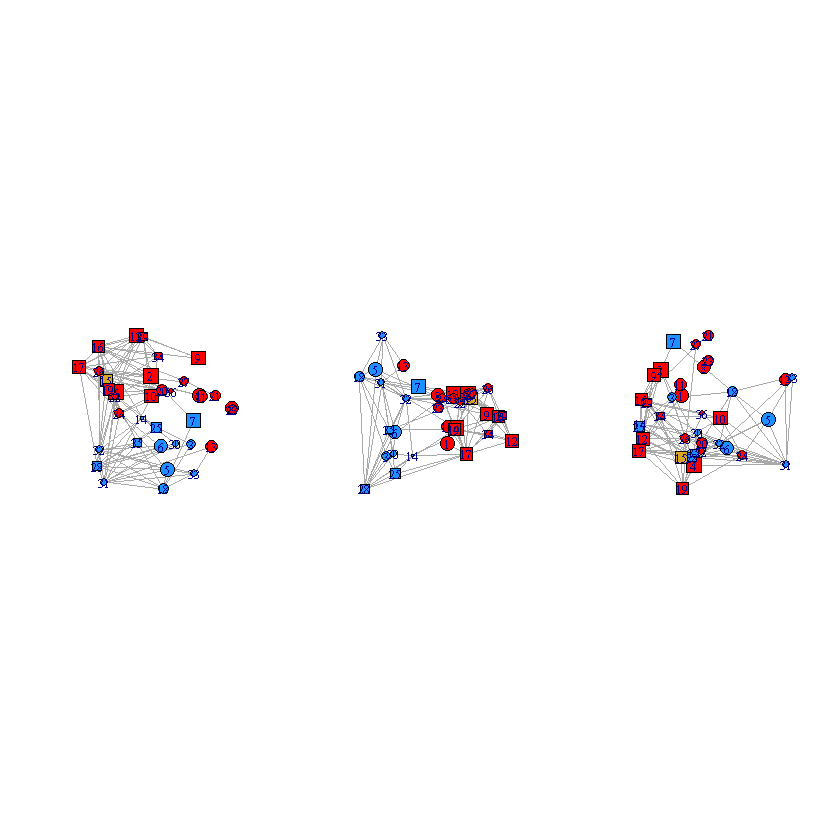

In [12]:
par(mfrow=c(1,3))

colbar<-c("red","dodgerblue","goldenrod")
v.colors<-colbar[V(lazega)$Office]
v.shapes<-c("circle","square")[V(lazega)$Practice]
v.size<-3.5*sqrt(V(lazega)$Years)
v.label<-V(lazega)$Seniority
plot(lazega,layout=lat.sp.1,vertex.color=v.colors,
     vertex.shape=v.shapes,vertex.size=v.size,vertex.label=v.label)
plot(lazega,layout=lat.sp.2,vertex.color=v.colors,
     vertex.shape=v.shapes,vertex.size=v.size,vertex.label=v.label)
plot(lazega,layout=lat.sp.3,vertex.color=v.colors,
     vertex.shape=v.shapes,vertex.size=v.size,vertex.label=v.label)

#first and second plot are similar.
#third plot is different with first and second plot.
#latent variable may be the role of the practice.

In [13]:
apply(lazega.leig.fit1$L_postsamp,2,mean) #L_postsamp is the posterior samples of eigen values.(i.e., 1000*2 matrix since the default of eigenmodel_mcmc's argument Nss is 1000)
apply(lazega.leig.fit2$L_postsamp,2,mean)
apply(lazega.leig.fit3$L_postsamp,2,mean)
#each eigenvalue explains the strength of the corresponding latent variable(eigen vector)..
#first model's eigen values don't match well with above first plot.(i.e., It seems like that the second eigen vector is more important than the first eigen vector in playing a role in determining the probability that vertex pairs are incident to each other, but eigen values don't match with it.)
#second model's eigen values match well with above second plot. and third too.

[1] 0.7582598 0.5253324

[1]  0.8706554 -0.2211593

[1] -0.1240265  0.3637222

## Cross Validation(5-fold)

In [14]:
perm.index<-sample(1:630) #index permutation
nfolds<-5
nmiss<-630/nfolds
Avec<-A[lower.tri(A)]
Avec.pred1<-numeric(length(Avec)) #initializing (out of sample prediction of first model)
Avec.pred2<-numeric(length(Avec)) #initializing (out of sample prediction of second model)
Avec.pred3<-numeric(length(Avec)) #initializing (out of sample prediction of third model)

In [15]:
#first model
for(i in seq(1,nfolds)){ 
  #index of missing values.
  miss.index<-seq(((i-1)*nmiss+1),(i*nmiss),1)
  A.miss.index<-perm.index[miss.index]
  
  #Fill a new Atemp appropriately with NA's
  Avec.temp<-Avec
  Avec.temp[A.miss.index]<-rep("NA",length(A.miss.index))
  Avec.temp<-as.numeric(Avec.temp)
  Atemp<-matrix(0,36,36)
  Atemp[lower.tri(Atemp)]<-Avec.temp
  Atemp<-Atemp+t(Atemp)
  
  Y<-Atemp #revised adjacency matrix
  
  model1.fit<-eigenmodel_mcmc(Y,R=2,S=11000,burn=10000)
  model1.pred<-model1.fit$Y_postmean
  model1.pred.vec<-model1.pred[lower.tri(model1.pred)]
  Avec.pred1[A.miss.index]<-model1.pred.vec[A.miss.index]
  
  
}

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:08:51 2020
10 percent done (iteration 2100) Mon Dec 14 23:08:55 2020
15 percent done (iteration 3150) Mon Dec 14 23:08:59 2020
20 percent done (iteration 4200) Mon Dec 14 23:09:03 2020
25 percent done (iteration 5250) Mon Dec 14 23:09:06 2020
30 percent done (iteration 6300) Mon Dec 14 23:09:10 2020
35 percent done (iteration 7350) Mon Dec 14 23:09:14 2020
40 percent done (iteration 8400) Mon Dec 14 23:09:18 2020
45 percent done (iteration 9450) Mon Dec 14 23:09:21 2020
50 percent done (iteration 10500) Mon Dec 14 23:09:25 2020
55 percent done (iteration 11550) Mon Dec 14 23:09:29 2020
60 percent done (iteration 12600) Mon Dec 14 23:09:33 2020
65 percent done (iteration 13650) Mon Dec 14 23:09:36 2020
70 percent done (iteration 14700) Mon Dec 14 23:09:40 2020
75 percent done (iteration 15750) Mon Dec 14 23:09:44 2020
80 percent done (iteration 16800) Mon Dec 14 23:09:48 2020
85 percent done (iteration 17850) Mon Dec 14 23:09:52 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:10:07 2020
10 percent done (iteration 2100) Mon Dec 14 23:10:10 2020
15 percent done (iteration 3150) Mon Dec 14 23:10:14 2020
20 percent done (iteration 4200) Mon Dec 14 23:10:18 2020
25 percent done (iteration 5250) Mon Dec 14 23:10:22 2020
30 percent done (iteration 6300) Mon Dec 14 23:10:25 2020
35 percent done (iteration 7350) Mon Dec 14 23:10:29 2020
40 percent done (iteration 8400) Mon Dec 14 23:10:33 2020
45 percent done (iteration 9450) Mon Dec 14 23:10:37 2020
50 percent done (iteration 10500) Mon Dec 14 23:10:40 2020
55 percent done (iteration 11550) Mon Dec 14 23:10:44 2020
60 percent done (iteration 12600) Mon Dec 14 23:10:48 2020
65 percent done (iteration 13650) Mon Dec 14 23:10:52 2020
70 percent done (iteration 14700) Mon Dec 14 23:10:55 2020
75 percent done (iteration 15750) Mon Dec 14 23:10:59 2020
80 percent done (iteration 16800) Mon Dec 14 23:11:03 2020
85 percent done (iteration 17850) Mon Dec 14 23:11:07 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:11:22 2020
10 percent done (iteration 2100) Mon Dec 14 23:11:25 2020
15 percent done (iteration 3150) Mon Dec 14 23:11:29 2020
20 percent done (iteration 4200) Mon Dec 14 23:11:33 2020
25 percent done (iteration 5250) Mon Dec 14 23:11:36 2020
30 percent done (iteration 6300) Mon Dec 14 23:11:40 2020
35 percent done (iteration 7350) Mon Dec 14 23:11:44 2020
40 percent done (iteration 8400) Mon Dec 14 23:11:48 2020
45 percent done (iteration 9450) Mon Dec 14 23:11:51 2020
50 percent done (iteration 10500) Mon Dec 14 23:11:55 2020
55 percent done (iteration 11550) Mon Dec 14 23:11:59 2020
60 percent done (iteration 12600) Mon Dec 14 23:12:02 2020
65 percent done (iteration 13650) Mon Dec 14 23:12:06 2020
70 percent done (iteration 14700) Mon Dec 14 23:12:10 2020
75 percent done (iteration 15750) Mon Dec 14 23:12:14 2020
80 percent done (iteration 16800) Mon Dec 14 23:12:17 2020
85 percent done (iteration 17850) Mon Dec 14 23:12:21 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:12:36 2020
10 percent done (iteration 2100) Mon Dec 14 23:12:40 2020
15 percent done (iteration 3150) Mon Dec 14 23:12:44 2020
20 percent done (iteration 4200) Mon Dec 14 23:12:48 2020
25 percent done (iteration 5250) Mon Dec 14 23:12:51 2020
30 percent done (iteration 6300) Mon Dec 14 23:12:55 2020
35 percent done (iteration 7350) Mon Dec 14 23:12:59 2020
40 percent done (iteration 8400) Mon Dec 14 23:13:03 2020
45 percent done (iteration 9450) Mon Dec 14 23:13:06 2020
50 percent done (iteration 10500) Mon Dec 14 23:13:10 2020
55 percent done (iteration 11550) Mon Dec 14 23:13:14 2020
60 percent done (iteration 12600) Mon Dec 14 23:13:18 2020
65 percent done (iteration 13650) Mon Dec 14 23:13:21 2020
70 percent done (iteration 14700) Mon Dec 14 23:13:25 2020
75 percent done (iteration 15750) Mon Dec 14 23:13:29 2020
80 percent done (iteration 16800) Mon Dec 14 23:13:33 2020
85 percent done (iteration 17850) Mon Dec 14 23:13:36 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:13:51 2020
10 percent done (iteration 2100) Mon Dec 14 23:13:55 2020
15 percent done (iteration 3150) Mon Dec 14 23:13:59 2020
20 percent done (iteration 4200) Mon Dec 14 23:14:03 2020
25 percent done (iteration 5250) Mon Dec 14 23:14:07 2020
30 percent done (iteration 6300) Mon Dec 14 23:14:11 2020
35 percent done (iteration 7350) Mon Dec 14 23:14:14 2020
40 percent done (iteration 8400) Mon Dec 14 23:14:18 2020
45 percent done (iteration 9450) Mon Dec 14 23:14:22 2020
50 percent done (iteration 10500) Mon Dec 14 23:14:26 2020
55 percent done (iteration 11550) Mon Dec 14 23:14:30 2020
60 percent done (iteration 12600) Mon Dec 14 23:14:33 2020
65 percent done (iteration 13650) Mon Dec 14 23:14:37 2020
70 percent done (iteration 14700) Mon Dec 14 23:14:41 2020
75 percent done (iteration 15750) Mon Dec 14 23:14:45 2020
80 percent done (iteration 16800) Mon Dec 14 23:14:49 2020
85 percent done (iteration 17850) Mon Dec 14 23:14:53 2020
90 perc

In [16]:
#second model(practice)
for(i in seq(1,nfolds)){
  #index of missing values.
  miss.index<-seq(((i-1)*nmiss+1),(i*nmiss),1)
  A.miss.index<-perm.index[miss.index]
  
  #Fill a new Atemp appropriately with NA's
  Avec.temp<-Avec
  Avec.temp[A.miss.index]<-rep("NA",length(A.miss.index))
  Avec.temp<-as.numeric(Avec.temp)
  Atemp<-matrix(0,36,36)
  Atemp[lower.tri(Atemp)]<-Avec.temp
  Atemp<-Atemp+t(Atemp)
  
  Y<-Atemp #revised adjacency matrix
  
  model2.fit<-eigenmodel_mcmc(Y,same.prac,R=2,S=11000,burn=10000)
  model2.pred<-model2.fit$Y_postmean
  model2.pred.vec<-model2.pred[lower.tri(model2.pred)]
  Avec.pred2[A.miss.index]<-model2.pred.vec[A.miss.index]
  
  
}

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:15:58 2020
10 percent done (iteration 2100) Mon Dec 14 23:16:02 2020
15 percent done (iteration 3150) Mon Dec 14 23:16:06 2020
20 percent done (iteration 4200) Mon Dec 14 23:16:10 2020
25 percent done (iteration 5250) Mon Dec 14 23:16:14 2020
30 percent done (iteration 6300) Mon Dec 14 23:16:18 2020
35 percent done (iteration 7350) Mon Dec 14 23:16:22 2020
40 percent done (iteration 8400) Mon Dec 14 23:16:25 2020
45 percent done (iteration 9450) Mon Dec 14 23:16:29 2020
50 percent done (iteration 10500) Mon Dec 14 23:16:33 2020
55 percent done (iteration 11550) Mon Dec 14 23:16:37 2020
60 percent done (iteration 12600) Mon Dec 14 23:16:41 2020
65 percent done (iteration 13650) Mon Dec 14 23:16:45 2020
70 percent done (iteration 14700) Mon Dec 14 23:16:49 2020
75 percent done (iteration 15750) Mon Dec 14 23:16:53 2020
80 percent done (iteration 16800) Mon Dec 14 23:16:57 2020
85 percent done (iteration 17850) Mon Dec 14 23:17:01 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:17:17 2020
10 percent done (iteration 2100) Mon Dec 14 23:17:21 2020
15 percent done (iteration 3150) Mon Dec 14 23:17:25 2020
20 percent done (iteration 4200) Mon Dec 14 23:17:29 2020
25 percent done (iteration 5250) Mon Dec 14 23:17:33 2020
30 percent done (iteration 6300) Mon Dec 14 23:17:36 2020
35 percent done (iteration 7350) Mon Dec 14 23:17:40 2020
40 percent done (iteration 8400) Mon Dec 14 23:17:44 2020
45 percent done (iteration 9450) Mon Dec 14 23:17:48 2020
50 percent done (iteration 10500) Mon Dec 14 23:17:52 2020
55 percent done (iteration 11550) Mon Dec 14 23:17:56 2020
60 percent done (iteration 12600) Mon Dec 14 23:18:00 2020
65 percent done (iteration 13650) Mon Dec 14 23:18:04 2020
70 percent done (iteration 14700) Mon Dec 14 23:18:08 2020
75 percent done (iteration 15750) Mon Dec 14 23:18:12 2020
80 percent done (iteration 16800) Mon Dec 14 23:18:16 2020
85 percent done (iteration 17850) Mon Dec 14 23:18:20 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:18:35 2020
10 percent done (iteration 2100) Mon Dec 14 23:18:39 2020
15 percent done (iteration 3150) Mon Dec 14 23:18:43 2020
20 percent done (iteration 4200) Mon Dec 14 23:18:47 2020
25 percent done (iteration 5250) Mon Dec 14 23:18:51 2020
30 percent done (iteration 6300) Mon Dec 14 23:18:55 2020
35 percent done (iteration 7350) Mon Dec 14 23:18:59 2020
40 percent done (iteration 8400) Mon Dec 14 23:19:03 2020
45 percent done (iteration 9450) Mon Dec 14 23:19:07 2020
50 percent done (iteration 10500) Mon Dec 14 23:19:11 2020
55 percent done (iteration 11550) Mon Dec 14 23:19:15 2020
60 percent done (iteration 12600) Mon Dec 14 23:19:19 2020
65 percent done (iteration 13650) Mon Dec 14 23:19:23 2020
70 percent done (iteration 14700) Mon Dec 14 23:19:26 2020
75 percent done (iteration 15750) Mon Dec 14 23:19:30 2020
80 percent done (iteration 16800) Mon Dec 14 23:19:34 2020
85 percent done (iteration 17850) Mon Dec 14 23:19:38 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:19:54 2020
10 percent done (iteration 2100) Mon Dec 14 23:19:58 2020
15 percent done (iteration 3150) Mon Dec 14 23:20:02 2020
20 percent done (iteration 4200) Mon Dec 14 23:20:06 2020
25 percent done (iteration 5250) Mon Dec 14 23:20:10 2020
30 percent done (iteration 6300) Mon Dec 14 23:20:14 2020
35 percent done (iteration 7350) Mon Dec 14 23:20:17 2020
40 percent done (iteration 8400) Mon Dec 14 23:20:21 2020
45 percent done (iteration 9450) Mon Dec 14 23:20:25 2020
50 percent done (iteration 10500) Mon Dec 14 23:20:29 2020
55 percent done (iteration 11550) Mon Dec 14 23:20:33 2020
60 percent done (iteration 12600) Mon Dec 14 23:20:37 2020
65 percent done (iteration 13650) Mon Dec 14 23:20:41 2020
70 percent done (iteration 14700) Mon Dec 14 23:20:45 2020
75 percent done (iteration 15750) Mon Dec 14 23:20:49 2020
80 percent done (iteration 16800) Mon Dec 14 23:20:53 2020
85 percent done (iteration 17850) Mon Dec 14 23:20:57 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:21:13 2020
10 percent done (iteration 2100) Mon Dec 14 23:21:17 2020
15 percent done (iteration 3150) Mon Dec 14 23:21:20 2020
20 percent done (iteration 4200) Mon Dec 14 23:21:24 2020
25 percent done (iteration 5250) Mon Dec 14 23:21:28 2020
30 percent done (iteration 6300) Mon Dec 14 23:21:32 2020
35 percent done (iteration 7350) Mon Dec 14 23:21:36 2020
40 percent done (iteration 8400) Mon Dec 14 23:21:40 2020
45 percent done (iteration 9450) Mon Dec 14 23:21:44 2020
50 percent done (iteration 10500) Mon Dec 14 23:21:48 2020
55 percent done (iteration 11550) Mon Dec 14 23:21:52 2020
60 percent done (iteration 12600) Mon Dec 14 23:21:55 2020
65 percent done (iteration 13650) Mon Dec 14 23:21:59 2020
70 percent done (iteration 14700) Mon Dec 14 23:22:03 2020
75 percent done (iteration 15750) Mon Dec 14 23:22:07 2020
80 percent done (iteration 16800) Mon Dec 14 23:22:11 2020
85 percent done (iteration 17850) Mon Dec 14 23:22:15 2020
90 perc

In [17]:
#third model(office)
for(i in seq(1,nfolds)){
  #index of missing values.
  miss.index<-seq(((i-1)*nmiss+1),(i*nmiss),1)
  A.miss.index<-perm.index[miss.index]
  
  #Fill a new Atemp appropriately with NA's
  Avec.temp<-Avec
  Avec.temp[A.miss.index]<-rep("NA",length(A.miss.index))
  Avec.temp<-as.numeric(Avec.temp)
  Atemp<-matrix(0,36,36)
  Atemp[lower.tri(Atemp)]<-Avec.temp
  Atemp<-Atemp+t(Atemp)
  
  Y<-Atemp #revised adjacency matrix
  
  model3.fit<-eigenmodel_mcmc(Y,same.off,R=2,S=11000,burn=10000)
  model3.pred<-model3.fit$Y_postmean
  model3.pred.vec<-model3.pred[lower.tri(model3.pred)]
  Avec.pred3[A.miss.index]<-model3.pred.vec[A.miss.index]
  
  
}

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:23:15 2020
10 percent done (iteration 2100) Mon Dec 14 23:23:19 2020
15 percent done (iteration 3150) Mon Dec 14 23:23:23 2020
20 percent done (iteration 4200) Mon Dec 14 23:23:26 2020
25 percent done (iteration 5250) Mon Dec 14 23:23:30 2020
30 percent done (iteration 6300) Mon Dec 14 23:23:34 2020
35 percent done (iteration 7350) Mon Dec 14 23:23:38 2020
40 percent done (iteration 8400) Mon Dec 14 23:23:42 2020
45 percent done (iteration 9450) Mon Dec 14 23:23:46 2020
50 percent done (iteration 10500) Mon Dec 14 23:23:50 2020
55 percent done (iteration 11550) Mon Dec 14 23:23:54 2020
60 percent done (iteration 12600) Mon Dec 14 23:23:57 2020
65 percent done (iteration 13650) Mon Dec 14 23:24:01 2020
70 percent done (iteration 14700) Mon Dec 14 23:24:05 2020
75 percent done (iteration 15750) Mon Dec 14 23:24:09 2020
80 percent done (iteration 16800) Mon Dec 14 23:24:13 2020
85 percent done (iteration 17850) Mon Dec 14 23:24:17 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:24:32 2020
10 percent done (iteration 2100) Mon Dec 14 23:24:36 2020
15 percent done (iteration 3150) Mon Dec 14 23:24:40 2020
20 percent done (iteration 4200) Mon Dec 14 23:24:44 2020
25 percent done (iteration 5250) Mon Dec 14 23:24:48 2020
30 percent done (iteration 6300) Mon Dec 14 23:24:51 2020
35 percent done (iteration 7350) Mon Dec 14 23:24:55 2020
40 percent done (iteration 8400) Mon Dec 14 23:24:59 2020
45 percent done (iteration 9450) Mon Dec 14 23:25:03 2020
50 percent done (iteration 10500) Mon Dec 14 23:25:07 2020
55 percent done (iteration 11550) Mon Dec 14 23:25:11 2020
60 percent done (iteration 12600) Mon Dec 14 23:25:15 2020
65 percent done (iteration 13650) Mon Dec 14 23:25:18 2020
70 percent done (iteration 14700) Mon Dec 14 23:25:22 2020
75 percent done (iteration 15750) Mon Dec 14 23:25:26 2020
80 percent done (iteration 16800) Mon Dec 14 23:25:30 2020
85 percent done (iteration 17850) Mon Dec 14 23:25:34 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:25:50 2020
10 percent done (iteration 2100) Mon Dec 14 23:25:54 2020
15 percent done (iteration 3150) Mon Dec 14 23:25:58 2020
20 percent done (iteration 4200) Mon Dec 14 23:26:02 2020
25 percent done (iteration 5250) Mon Dec 14 23:26:06 2020
30 percent done (iteration 6300) Mon Dec 14 23:26:10 2020
35 percent done (iteration 7350) Mon Dec 14 23:26:14 2020
40 percent done (iteration 8400) Mon Dec 14 23:26:18 2020
45 percent done (iteration 9450) Mon Dec 14 23:26:22 2020
50 percent done (iteration 10500) Mon Dec 14 23:26:26 2020
55 percent done (iteration 11550) Mon Dec 14 23:26:30 2020
60 percent done (iteration 12600) Mon Dec 14 23:26:34 2020
65 percent done (iteration 13650) Mon Dec 14 23:26:38 2020
70 percent done (iteration 14700) Mon Dec 14 23:26:42 2020
75 percent done (iteration 15750) Mon Dec 14 23:26:46 2020
80 percent done (iteration 16800) Mon Dec 14 23:26:50 2020
85 percent done (iteration 17850) Mon Dec 14 23:26:54 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:27:10 2020
10 percent done (iteration 2100) Mon Dec 14 23:27:14 2020
15 percent done (iteration 3150) Mon Dec 14 23:27:18 2020
20 percent done (iteration 4200) Mon Dec 14 23:27:21 2020
25 percent done (iteration 5250) Mon Dec 14 23:27:25 2020
30 percent done (iteration 6300) Mon Dec 14 23:27:29 2020
35 percent done (iteration 7350) Mon Dec 14 23:27:33 2020
40 percent done (iteration 8400) Mon Dec 14 23:27:37 2020
45 percent done (iteration 9450) Mon Dec 14 23:27:41 2020
50 percent done (iteration 10500) Mon Dec 14 23:27:44 2020
55 percent done (iteration 11550) Mon Dec 14 23:27:48 2020
60 percent done (iteration 12600) Mon Dec 14 23:27:52 2020
65 percent done (iteration 13650) Mon Dec 14 23:27:56 2020
70 percent done (iteration 14700) Mon Dec 14 23:28:00 2020
75 percent done (iteration 15750) Mon Dec 14 23:28:04 2020
80 percent done (iteration 16800) Mon Dec 14 23:28:07 2020
85 percent done (iteration 17850) Mon Dec 14 23:28:11 2020
90 perc

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"

5 percent done (iteration 1050) Mon Dec 14 23:28:27 2020
10 percent done (iteration 2100) Mon Dec 14 23:28:30 2020
15 percent done (iteration 3150) Mon Dec 14 23:28:34 2020
20 percent done (iteration 4200) Mon Dec 14 23:28:38 2020
25 percent done (iteration 5250) Mon Dec 14 23:28:42 2020
30 percent done (iteration 6300) Mon Dec 14 23:28:46 2020
35 percent done (iteration 7350) Mon Dec 14 23:28:50 2020
40 percent done (iteration 8400) Mon Dec 14 23:28:53 2020
45 percent done (iteration 9450) Mon Dec 14 23:28:57 2020
50 percent done (iteration 10500) Mon Dec 14 23:29:01 2020
55 percent done (iteration 11550) Mon Dec 14 23:29:05 2020
60 percent done (iteration 12600) Mon Dec 14 23:29:09 2020
65 percent done (iteration 13650) Mon Dec 14 23:29:13 2020
70 percent done (iteration 14700) Mon Dec 14 23:29:17 2020
75 percent done (iteration 15750) Mon Dec 14 23:29:20 2020
80 percent done (iteration 16800) Mon Dec 14 23:29:24 2020
85 percent done (iteration 17850) Mon Dec 14 23:29:28 2020
90 perc

## compare three models

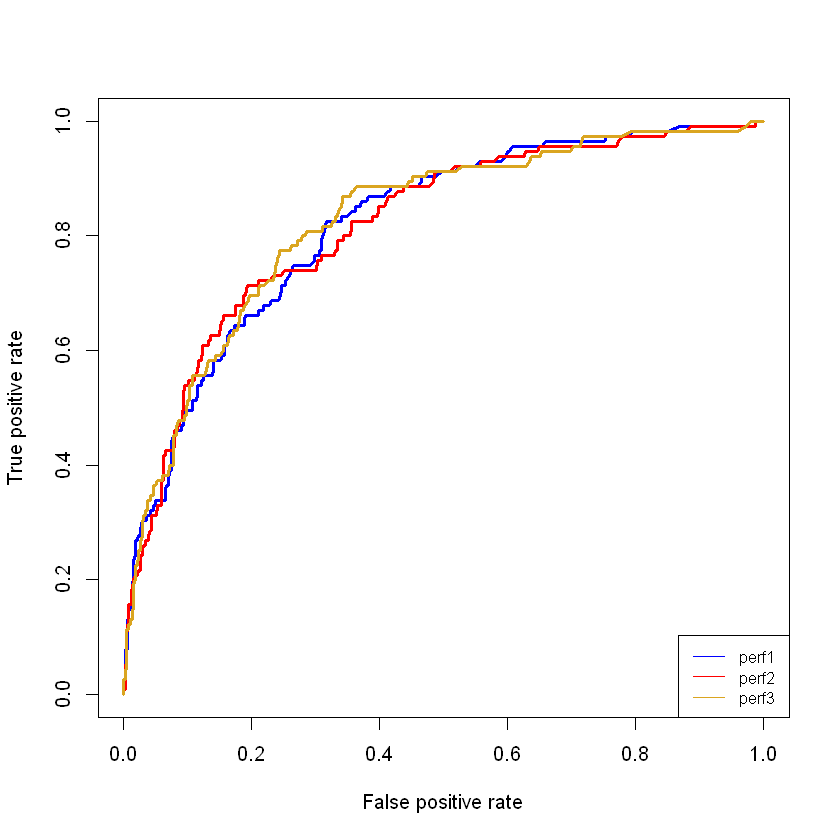

In [18]:
#Get ROC curve
par(mfrow=c(1,1))
library(ROCR)
pred1<-prediction(Avec.pred1,Avec) #Avec is real Yij
perf1<-performance(pred1,"tpr","fpr")
plot(perf1,col="blue",lwd=3)

pred2<-prediction(Avec.pred2,Avec)
perf2<-performance(pred2,"tpr","fpr")
plot(perf2,col="red",lwd=3,add=TRUE)

pred3<-prediction(Avec.pred3,Avec)
perf3<-performance(pred3,"tpr","fpr")
plot(perf3,col="goldenrod",lwd=3,add=TRUE)

legend("bottomright",legend=c("perf1","perf2","perf3"),col=c("blue","red","goldenrod"),lty=1,cex=0.8)

In [19]:
#Get AUC
perf1.auc<-performance(pred1,"auc")
slot(perf1.auc,"y.values")

perf2.auc<-performance(pred2,"auc")
slot(perf2.auc,"y.values")

perf3.auc<-performance(pred3,"auc")
slot(perf3.auc,"y.values") #similar performance!

[[1]]
[1] 0.8191811

[[1]]
[1] 0.8184466

[[1]]
[1] 0.8251245